In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Accidents 2012-2016.csv', 'Vehicles in Accidents 2012-2016.csv']


In [2]:
accidents = pd.read_csv('../input/Accidents 2012-2016.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vehicles = pd.read_csv('../input/Vehicles in Accidents 2012-2016.csv')

In [4]:
print(accidents.shape)
print(vehicles.shape)


(629164, 34)
(1038182, 24)


In [5]:
accidents.head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,201201BS70001,A,308,C,0.0,Slight,None,2012-01-19,Thursday,1.0,Auto traffic signal,Crossroads,51.493429,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,527200.0,178760.0,-0.169101,E01002821,1,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:35,Urban,Fine no high winds,2012,No
1,201201BS70003,A,3220,Unclassified,0.0,Slight,None,2012-01-10,Tuesday,1.0,Give way or uncontrolled,Crossroads,51.487618,Daylight,Kensington and Chelsea,Kensington and Chelsea,525860.0,178080.0,-0.188636,E01002893,1,2,0.0,4.0,Metropolitan Police,Dry,One way street,None,30.0,10:07,Urban,Fine no high winds,2012,No
2,201201BS70004,C,0,Unclassified,0.0,Slight,None,2012-01-18,Wednesday,1.0,Give way or uncontrolled,T or staggered junction,51.514325,Daylight,Kensington and Chelsea,Kensington and Chelsea,524980.0,181030.0,-0.200259,E01002886,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,12:20,Urban,Fine no high winds,2012,No


In [6]:
vehicles.head(3)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,201201BS70001,16 - 20,5.0,Urban area,7.0,1390.0,None,None,Not known,Mid Junction - on roundabout or on main road,VOLKSWAGEN,POLO S 80 AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,Car,No,Nearside,2012
1,201201BS70003,56 - 65,8.0,Urban area,3.0,1600.0,None,None,Not known,Mid Junction - on roundabout or on main road,VOLKSWAGEN,GOLF S AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2012
2,201201BS70003,36 - 45,2.0,Urban area,2.0,124.0,None,None,Not known,Mid Junction - on roundabout or on main road,PIAGGIO,FLY 125,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front,2012


Σαν ένα πρώτο βήμα θα διαγράψουμε κάποιες στήλες του συνόλου δεδομένων οι οποίες δε μας βοηθούν στην ανάλυση που θα πραγματοποιήσουμε παρακάτω.

In [7]:
accidents.isna().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     0
2nd_Road_Class                                 251243
2nd_Road_Number                                  4133
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident         9
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                           34
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                              34
Location_Northing_OSGR                             34
Longitude                   

In [8]:
accidents = accidents.drop(['2nd_Road_Class',\
                            '2nd_Road_Number',\
                            'Carriageway_Hazards',\
                            'Did_Police_Officer_Attend_Scene_of_Accident',\
                            'Local_Authority_(District)',\
                            'Local_Authority_(Highway)',\
                            'Location_Easting_OSGR',\
                            'Location_Northing_OSGR',\
                            'LSOA_of_Accident_Location',\
                            'Pedestrian_Crossing-Human_Control',\
                            'Pedestrian_Crossing-Physical_Facilities',\
                            'Police_Force',\
                            'InScotland',\
                            'Special_Conditions_at_Site',\
                            ]
                            ,axis =1 )

In [9]:
# Remove rows with NAs
print(accidents.shape)
accidents = accidents.dropna()
print(accidents.shape)

(629164, 20)
(629063, 20)


In [10]:
# accidents.isna().sum()

Στη συνέχεια θα κάνουμε κάποιες μετατροπές στους τύπους δεδομένων ορισμένων στήλων. Για παράδειγμα πολλές μεταβλητές λαμβάνουν συγκεκριμένες τιμές οπότε θα τις μετατρέψουμε σε κατηγορικές.

In [11]:
#Data type conversion
accidents = accidents.astype({'Accident_Index': 'str', \
                              '1st_Road_Class':'category'
                              ''
                             })
print(accidents.dtypes)

Accident_Index               object
1st_Road_Class             category
1st_Road_Number               int64
Accident_Severity            object
Date                         object
Day_of_Week                  object
Junction_Control             object
Junction_Detail              object
Latitude                    float64
Light_Conditions             object
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions      object
Road_Type                    object
Speed_limit                 float64
Time                         object
Urban_or_Rural_Area          object
Weather_Conditions           object
Year                          int64
dtype: object


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


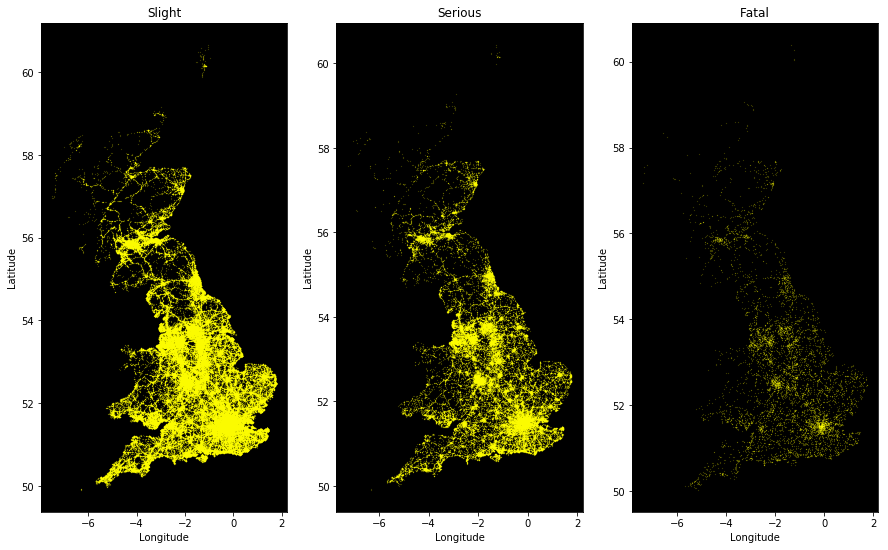

In [12]:
level3 = accidents[accidents['Accident_Severity'] == 'Slight']
level2 = accidents[accidents['Accident_Severity'] == 'Serious']
level1 = accidents[accidents['Accident_Severity'] == 'Fatal']

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,9))

## Slight plot
level3.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Slight")
ax1.set_facecolor('black')

## Serious plot
level2.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Serious")
ax2.set_facecolor('black')

# Fatal plot

level1.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("Fatal")
ax3.set_facecolor('black')




f.show()

In [13]:
ag = accidents.groupby('Accident_Severity').Road_Type.value_counts().sort_index()

In [14]:
ag.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Accident_Severity,,,,,,
Fatal,1472,85,117,5727,45,28
Serious,11742,1660,4325,70854,633,375
Slight,80559,10609,39054,392668,6159,2951


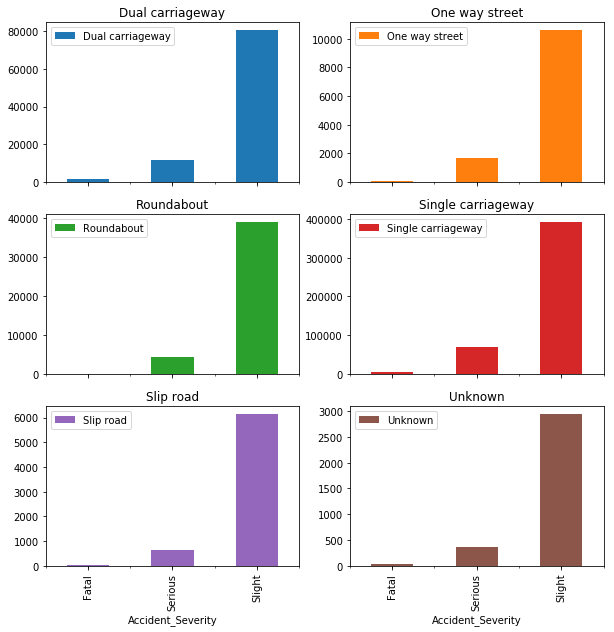

In [15]:
ag.unstack().plot(kind='bar', subplots=True, layout=(3,2),figsize= (10,10))
plt.show()

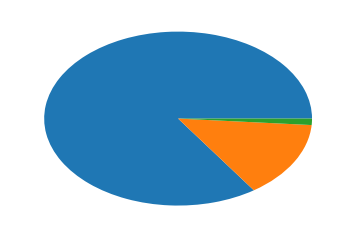

In [16]:
# ag1 =accidents.groupby('Accident_Severity').Accident_Severity.value_counts().sort_index()
# ag.unstack().plot(kind='pie', subplots=True,layout = (2,2) ,figsize= (13,13))
# plt.show()

a =plt.pie(accidents.Accident_Severity.value_counts(), )
plt.show()

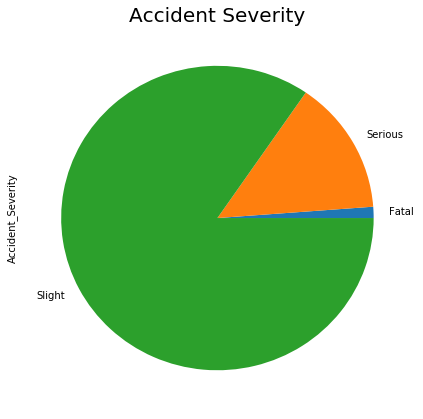

In [17]:
ag = accidents.Accident_Severity.value_counts().sort_index()

plt.figure(figsize=(7,7))
ag.plot(kind='pie', subplots=True,figsize= (13,13))
plt.title('Accident Severity' , fontsize= 20)
plt.grid(False)
# plt.ylabel('Accident count' , fontsize = 20)
# plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)


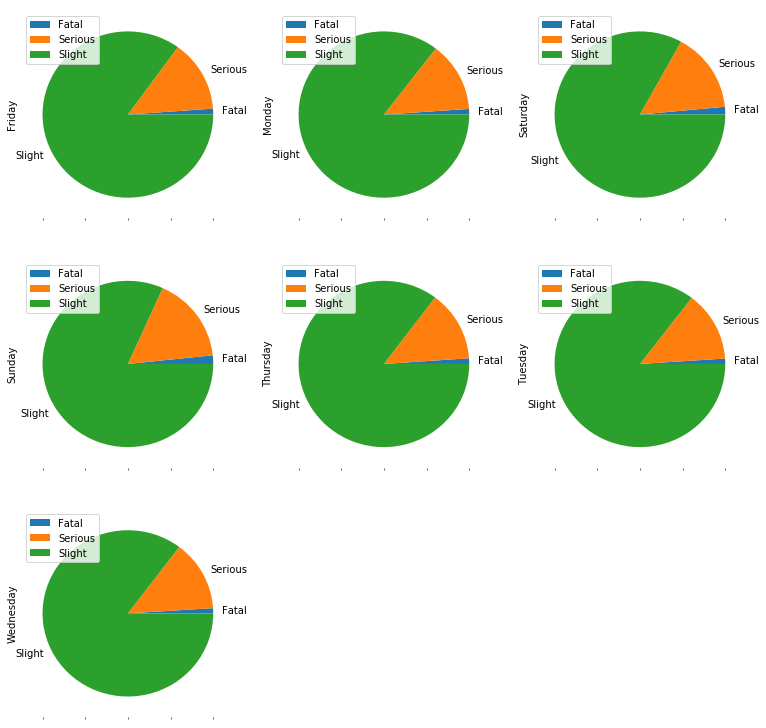

In [18]:
ag = accidents.groupby('Accident_Severity').Day_of_Week.value_counts().sort_index()
# ag.unstack()
ag.unstack().plot(kind='pie', subplots=True, layout=(3,3),figsize= (13,13))
plt.show()

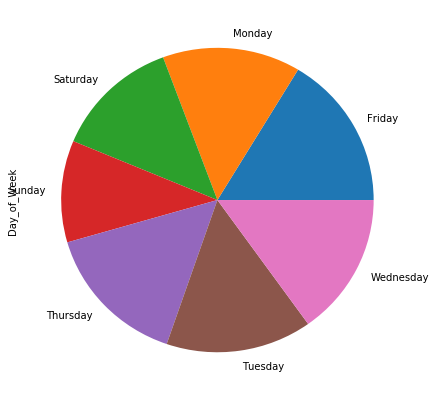

In [19]:
ag = accidents.Day_of_Week.value_counts().sort_index()
ag.plot(kind='pie',figsize= (7,7))

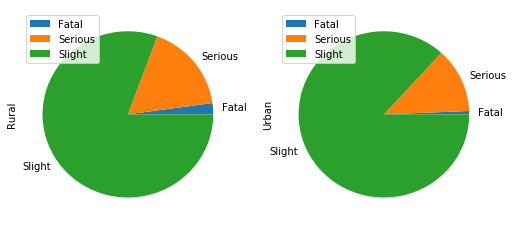

In [20]:
ag = accidents.groupby('Accident_Severity').Urban_or_Rural_Area.value_counts().sort_index()
ag.unstack()
ag.unstack().plot(kind='pie', subplots=True, layout=(3,3),figsize= (13,13))
plt.show()

In [21]:
year_wise_casualties = accidents.groupby(['Year'])['Number_of_Casualties'].sum()
year_wise_casualties = year_wise_casualties.reset_index()
year_wise_casualties

,Year,Number_of_Casualties
0,2012,162806
1,2013,155282
2,2014,165152
3,2015,186130
4,2016,181323


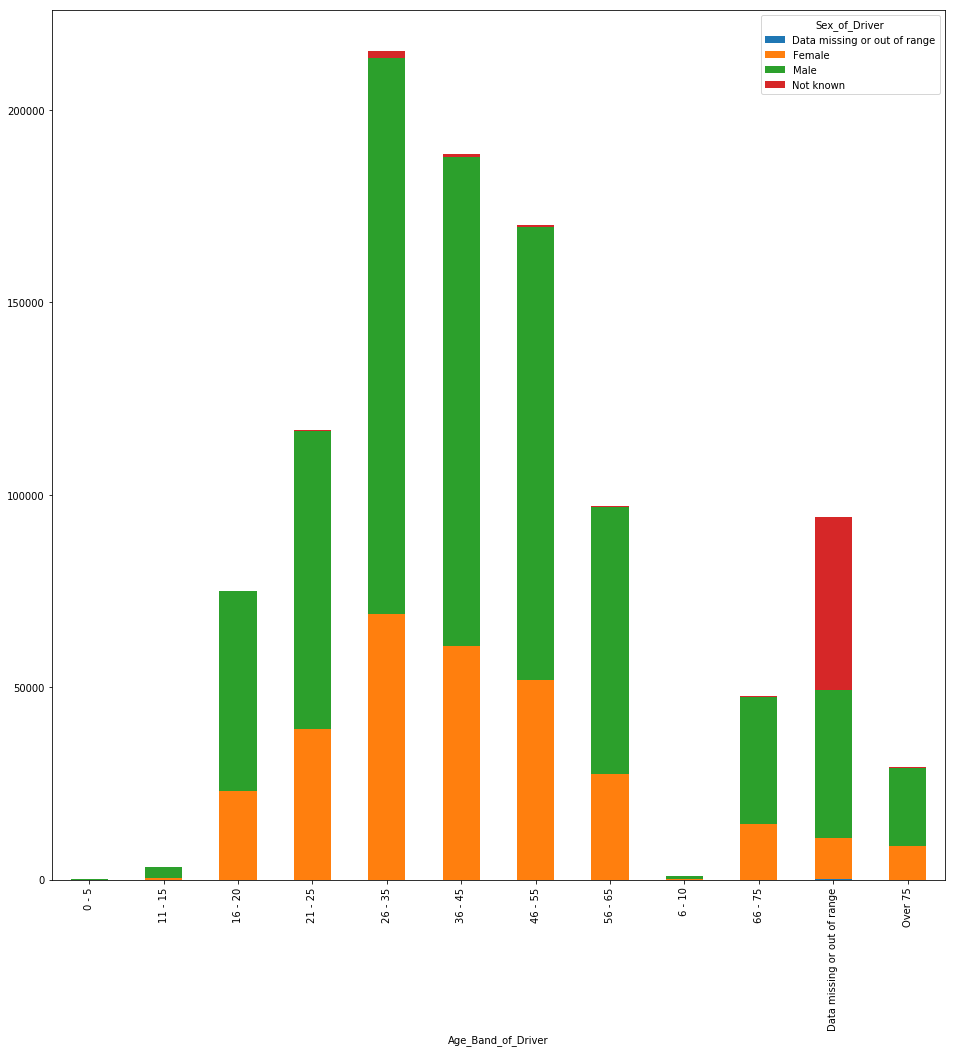

In [22]:
# names = ['0 - 5','6 - 10','11 - 15','16 - 20','21 - 25','26 - 35','36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range']
ag = vehicles.groupby('Age_Band_of_Driver').Sex_of_Driver.value_counts().sort_index()
ag.unstack().plot(kind='bar', stacked =True, layout=(4,4),figsize= (16,16))
plt.show()

In [23]:
ag = vehicles.groupby('Age_Band_of_Driver').Sex_of_Driver.value_counts().sort_index()
ag.unstack()

Sex_of_Driver,Data missing or out of range,Female,Male,Not known
Age_Band_of_Driver,,,,
0 - 5,NaN,26.0,91.0,4.0
11 - 15,NaN,360.0,2873.0,2.0
16 - 20,NaN,23073.0,51828.0,220.0
21 - 25,2.0,39232.0,77270.0,354.0
26 - 35,2.0,68976.0,144608.0,1633.0
36 - 45,NaN,60737.0,127075.0,834.0
46 - 55,2.0,51887.0,117809.0,494.0
56 - 65,1.0,27503.0,69232.0,258.0
6 - 10,NaN,192.0,667.0,NaN


In [24]:
import warnings
warnings.filterwarnings('ignore')
# graphing and visualization

import folium
import folium.plugins as plugins
# from mpl_toolkits.basemap import Basemap

# import heapq 

In [25]:
# accidents.head(3)

In [26]:
data=[]
tempdf = accidents.sample(30000)
tempdf["Time"]= tempdf["Time"].astype(str)
tempdf['Time']= tempdf['Time'].str.slice(0,2, 1)
tempdf["Time"]= tempdf["Time"].astype(int)

csts=list(tempdf['Time'].unique())
for row in csts:
    subset=tempdf[tempdf['Time']==row]
    data.append(subset[['Latitude','Longitude']].values.tolist())

# for i in range(10):
#     temp = accidents[i]
#     data.append(temp[['Latitude','Longitude']].values.tolist())
    
# lat = 52.476672
# lon = -1.856415
lat = 53.976672
lon = -1.856415

zoom_start = 6
print("Accidents during the Time of Day")
indx=[]
for i in range(1,24):
    indx.append(str(i)+':00')
indx.append('00:00')
# lat and lon varaibles , is where the animation begins.
m = folium.Map(location=[lat, lon], tiles="Cartodb dark_matter", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
# hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=10,max_speed=0.1)
hm = plugins.HeatMapWithTime(data,radius=5,index=indx, scale_radius = False,\
                             max_opacity=0.7,auto_play=True,display_index=True,index_steps = 1,max_speed=0.1)
hm.add_to(m)
m

Accidents during the Time of Day


In [27]:
accidents.shape


(629063, 20)

In [28]:
import seaborn as sn

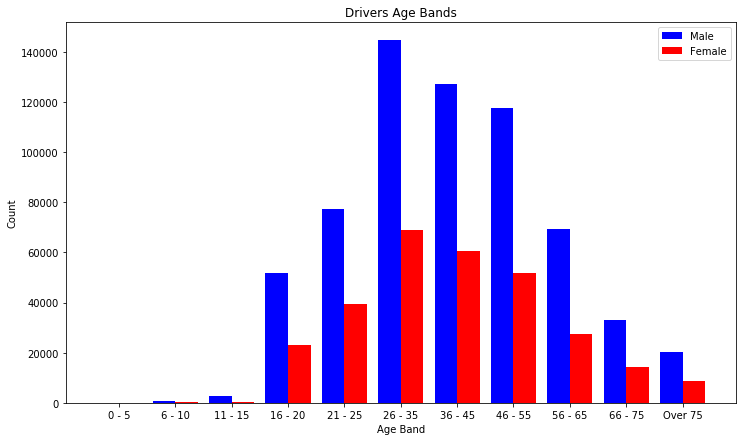

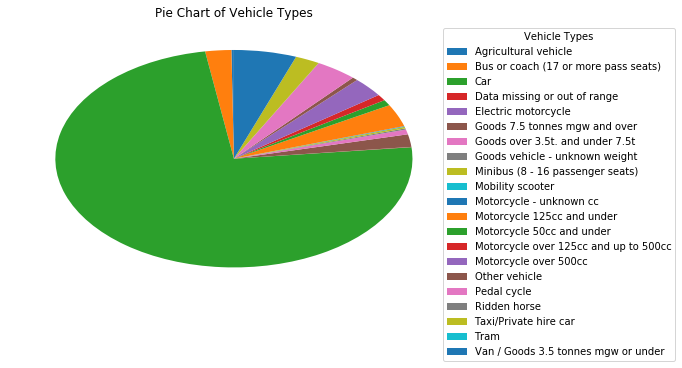

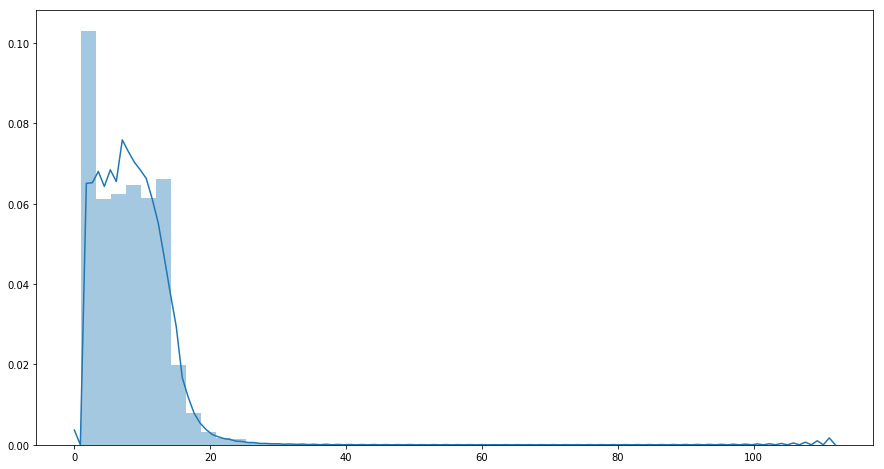

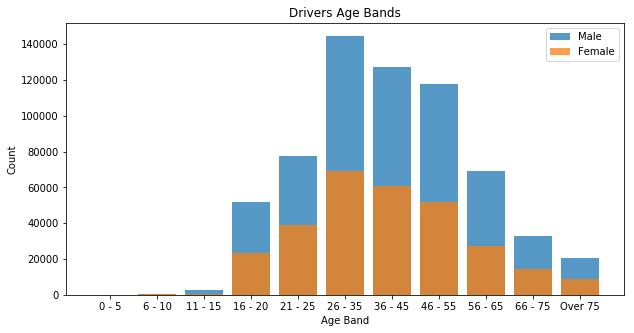

In [29]:
veh_temp = pd.DataFrame()
veh_temp["Age_Band_of_Driver"] = vehicles["Age_Band_of_Driver"]
veh_temp["Age_of_Vehicle"] = vehicles['Age_of_Vehicle']
veh_temp["Sex_of_Driver"] = vehicles["Sex_of_Driver"]
veh_temp["Vehicle_Type"] = vehicles["Vehicle_Type"]

veh_temp['Age_Band_of_Driver'] = pd.Categorical(veh_temp['Age_Band_of_Driver'], categories=['0 - 5','6 - 10','11 - 15','16 - 20','21 - 25','26 - 35', '36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range'], ordered=True)

Male = veh_temp[veh_temp['Sex_of_Driver'] == 'Male']["Age_Band_of_Driver"].value_counts().sort_index()
Female = veh_temp[veh_temp['Sex_of_Driver'] == 'Female']["Age_Band_of_Driver"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,7))
ind = np.arange(len(Male)-1)
width = 0.4  
p1 = ax.bar(ind, Male[0:11].values, width, color='b')
p2 = ax.bar(ind + width, Female[0:11].values, width,color='r')

plt.title("Drivers Age Bands")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Male[0:11].index)
plt.ylabel("Count")
plt.xlabel("Age Band")
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()

Type = veh_temp["Vehicle_Type"].value_counts().sort_index()
labels = list(Type.index)
data = list(Type.values)

plt.figure(1, figsize=(8,5))
wedges, texts = plt.pie(data,startangle=90)
plt.title("Pie Chart of Vehicle Types")
plt.legend(wedges, labels,
          title="Vehicle Types",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


Ages = pd.DataFrame(veh_temp['Age_of_Vehicle'])
Ages = Ages.dropna()
plt.figure(1, figsize=(15,8))
sn.distplot(Ages)


veh_temp['Age_Band_of_Driver'] = pd.Categorical(veh_temp['Age_Band_of_Driver'], categories=['0 - 5','6 - 10','11 - 15','16 - 20','21 - 25','26 - 35', '36 - 45','46 - 55','56 - 65','66 - 75','Over 75','Data missing or out of range'], ordered=True)


Male = veh_temp[veh_temp['Sex_of_Driver'] == 'Male']["Age_Band_of_Driver"].value_counts().sort_index()
Female = veh_temp[veh_temp['Sex_of_Driver'] == 'Female']["Age_Band_of_Driver"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(Male[0:11].index, Male[0:11].values, alpha=0.75)
plt.bar(Female[0:11].index, Female[0:11].values, alpha=0.75)
plt.title("Drivers Age Bands")
plt.ylabel("Count")
plt.xlabel("Age Band")
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()

In [30]:
# import cityphi.application

In [31]:
accidents_ML = accidents.drop(['Accident_Index',\
                               'Number_of_Casualties',\
                               'Light_Conditions',\
                               '1st_Road_Number',\
                               'Date',\
                               'Latitude',\
                               'Junction_Control',\
                               'Junction_Detail',\
                               'Longitude',\
                               'Year'],axis =1)

In [32]:
accidents_categorical = accidents_ML.drop(['Number_of_Vehicles',\
                               'Speed_limit',\
                               'Time'],axis =1)

from scipy.stats import chi2_contingency
available_features = [feature for feature in accidents_categorical.columns]

chi2_matrix = []
index = []

for feature_a in available_features:
    index.append(feature_a)
    row = []
    for feature_b in available_features:
        contingency = pd.crosstab(accidents_categorical[feature_a],
                                  accidents_categorical[feature_b])
        #acceptance level is 0.05
        p = chi2_contingency(contingency)[1]
        row.append(p)
    chi2_matrix.append(row)
    
chi2_p_values = pd.DataFrame(chi2_matrix, columns=index, index=index)
chi2_p_values

,1st_Road_Class,Accident_Severity,Day_of_Week,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions
1st_Road_Class,0.000000e+00,5.894179e-221,3.141462e-34,0.000000e+00,0.000000e+00,0.000000e+00,3.234158e-249
Accident_Severity,5.894179e-221,0.000000e+00,4.370555e-175,6.767837e-30,0.000000e+00,0.000000e+00,5.744842e-91
Day_of_Week,3.141462e-34,4.370555e-175,0.000000e+00,3.577433e-95,7.940416e-17,1.766236e-179,6.748964e-107
Road_Surface_Conditions,0.000000e+00,6.767837e-30,3.577433e-95,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Road_Type,0.000000e+00,0.000000e+00,7.940416e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Urban_or_Rural_Area,0.000000e+00,0.000000e+00,1.766236e-179,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Weather_Conditions,3.234158e-249,5.744842e-91,6.748964e-107,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [33]:
accidents_ML.shape

(629063, 10)

In [34]:
accidents_ML.head(3)

,1st_Road_Class,Accident_Severity,Day_of_Week,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,A,Slight,Thursday,2,Dry,Single carriageway,30.0,20:35,Urban,Fine no high winds
1,A,Slight,Tuesday,2,Dry,One way street,30.0,10:07,Urban,Fine no high winds
2,C,Slight,Wednesday,1,Dry,Single carriageway,30.0,12:20,Urban,Fine no high winds


In [35]:
# labels = accidents_ML.Accident_Severity.tolist()
# labels[0:5]

In [36]:
col = ['1st_Road_Class','Day_of_Week','Road_Surface_Conditions','Road_Type','Urban_or_Rural_Area','Weather_Conditions']
X = pd.get_dummies(accidents_ML, columns=col)
# X = X.drop(['Accident_Severity'],axis=1)
X.head(5)

,Accident_Severity,Number_of_Vehicles,Speed_limit,Time,1st_Road_Class_A,1st_Road_Class_A(M),1st_Road_Class_B,1st_Road_Class_C,1st_Road_Class_Motorway,1st_Road_Class_Unclassified,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Road_Surface_Conditions_Data missing or out of range,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Data missing or out of range,Weather_Conditions_Fine + high winds,Weather_Conditions_Fine no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,Weather_Conditions_Raining no high winds,Weather_Conditions_Snowing + high winds,Weather_Conditions_Snowing no high winds,Weather_Conditions_Unknown
0,Slight,2,30.0,20:35,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,Slight,2,30.0,10:07,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Slight,1,30.0,12:20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,Slight,1,30.0,20:24,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Slight,2,30.0,07:30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [37]:
X["Time"]= X["Time"].astype(str)
X['Time']= X['Time'].str.slice(0,2, 1)
X["Time"]= X["Time"].astype(int)

In [38]:
X.head(5)
X.shape

(629063, 41)

In [39]:
X["Speed_limit"]= X["Speed_limit"].astype(int)
X.head(5)


,Accident_Severity,Number_of_Vehicles,Speed_limit,Time,1st_Road_Class_A,1st_Road_Class_A(M),1st_Road_Class_B,1st_Road_Class_C,1st_Road_Class_Motorway,1st_Road_Class_Unclassified,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Road_Surface_Conditions_Data missing or out of range,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urban,Weather_Conditions_Data missing or out of range,Weather_Conditions_Fine + high winds,Weather_Conditions_Fine no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,Weather_Conditions_Raining no high winds,Weather_Conditions_Snowing + high winds,Weather_Conditions_Snowing no high winds,Weather_Conditions_Unknown
0,Slight,2,30,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,Slight,2,30,10,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Slight,1,30,12,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,Slight,1,30,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Slight,2,30,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [40]:
X2 = pd.DataFrame(X)

In [41]:
# Class count
count_slight, count_serious, count_fatal = X.Accident_Severity.value_counts()

print(count_slight,count_serious, count_fatal)

# Divide by class
df_slight = X[X['Accident_Severity'] == 'Slight']
df_serious = X[X['Accident_Severity'] == 'Serious']
df_fatal = X[X['Accident_Severity'] == 'Fatal']

532000 89589 7474


Random under-sampling:
Fatal      7474
Slight     7474
Serious    7474
Name: Accident_Severity, dtype: int64


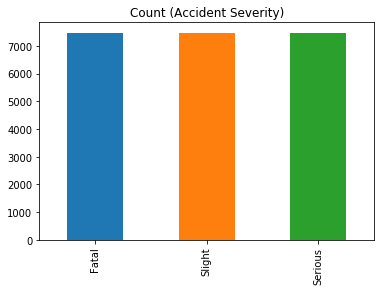

In [42]:
df_slight_under = df_slight.sample(count_fatal)
df_serious_under = df_serious.sample(count_fatal)

train_under = pd.concat([df_slight_under, df_serious_under, df_fatal], axis=0)

print('Random under-sampling:')
print(train_under.Accident_Severity.value_counts())

train_under.Accident_Severity.value_counts().plot(kind='bar', title='Count (Accident Severity)');

In [43]:
X = train_under

In [44]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(X, test_size=0.1, random_state=42)

In [45]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["Accident_Severity"].copy()
train_set = train_set.drop("Accident_Severity", axis=1)

test_set_labels = test_set["Accident_Severity"].copy()
test_set = test_set.drop("Accident_Severity", axis=1)

In [46]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()

scaler.fit(train_set)

train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
df = pd.DataFrame(data=train_set_scaled)
df.shape

(20179, 40)

In [48]:
# train_set_labels

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_set_labels)
y_train

array([2, 1, 1, ..., 2, 2, 0])

In [50]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier())) 
models.append(('DTC', DecisionTreeClassifier())) 

In [52]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X_train = train_set_scaled

In [53]:
# Every algorithm is tested and results are
# collected and printed
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=kappa_scorer,n_jobs = -1)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='balanced_accuracy',n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.467822 (0.006337)
RFC: 0.421659 (0.009656)
DTC: 0.413826 (0.009665)


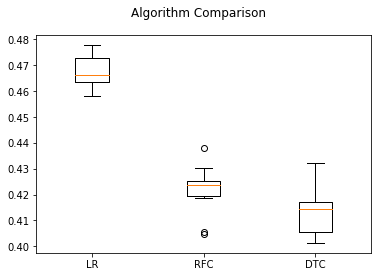

In [54]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [55]:
x_test = test_set_scaled
y_test = le.fit_transform(test_set_labels)
y_test

array([2, 0, 0, ..., 0, 2, 1])

In [56]:
models[0][1].fit(X_train, y_train)

models[1][1].fit(X_train, y_train)

models[2][1].fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
from sklearn.metrics import balanced_accuracy_score

predictions_LR = models[0][1].predict(x_test)
# score1 = cohen_kappa_score(predictions_LR, y_test)
score1 = balanced_accuracy_score(predictions_LR, y_test)
print("Logistic Regression Test Accuracy:",score1)

predictions_RFC = models[1][1].predict(x_test)
# score2 = cohen_kappa_score(predictions_RFC, y_test) 
score2 = balanced_accuracy_score(predictions_RFC, y_test)
print("Random Forest Test Accuracy:",score2)

predictions_DTC = models[2][1].predict(x_test)
# score3 = cohen_kappa_score(predictions_DTC, y_test) 
score3 = balanced_accuracy_score(predictions_DTC, y_test)
print("Decision Tree Test Accuracy:",score3)

Logistic Regression Test Accuracy: 0.46024015786228345
Random Forest Test Accuracy: 0.4402742183924912
Decision Tree Test Accuracy: 0.42433978455275106


In [58]:
import seaborn as sns
from sklearn import metrics

cm_LR = metrics.confusion_matrix(y_test, predictions_LR)
print(cm_LR)
cm_RFC = metrics.confusion_matrix(y_test, predictions_RFC)
print(cm_RFC)
cm_DTC = metrics.confusion_matrix(y_test, predictions_DTC)
print(cm_DTC)

[[435 111 173]
 [235 179 347]
 [185 141 437]]
[[366 203 150]
 [209 291 261]
 [181 251 331]]
[[375 202 142]
 [255 284 222]
 [215 255 293]]


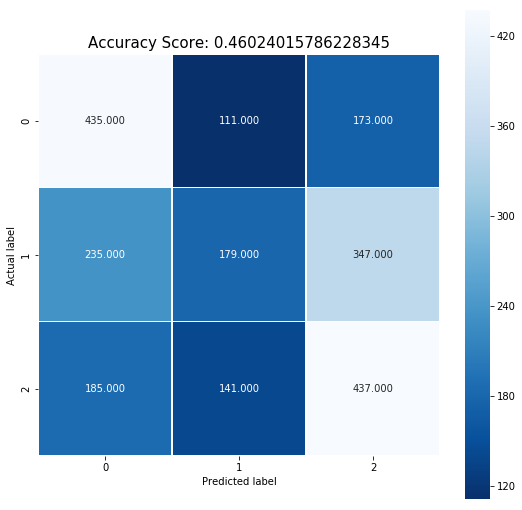

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

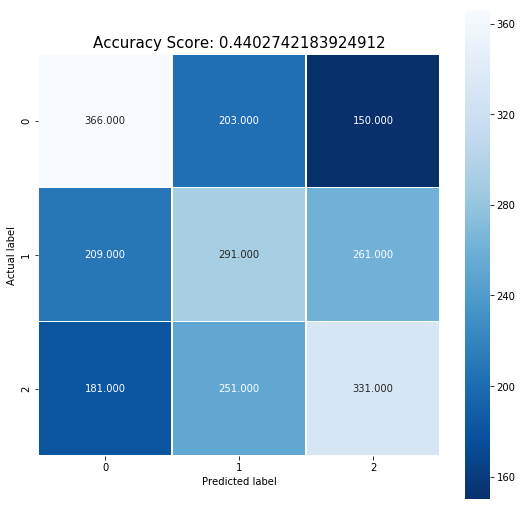

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_RFC, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

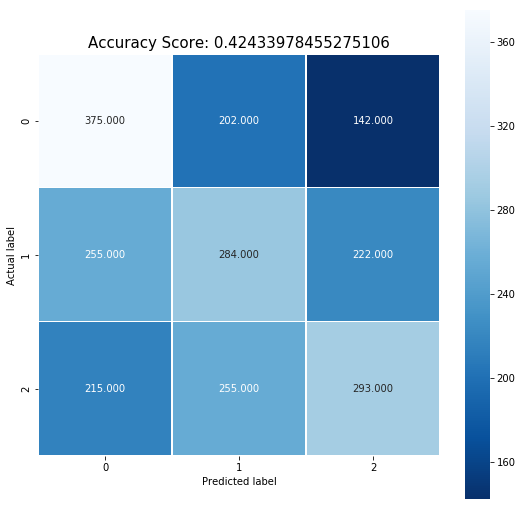

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_DTC, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title, size = 15);

In [62]:
# Grid Search
from sklearn.model_selection import GridSearchCV


In [63]:
RFC = RandomForestClassifier(random_state=42)
# bootstrap = [True,False]
# max_depth =  [70,80, 90, 100, 110,120, None]
max_features = ['log2','sqrt']
# min_samples_leaf = [3, 4, 5]
# min_samples_split = [2,10,50,100, 150]
# n_estimators = [20,50,100, 200, 300]
n_estimators = [200]

In [64]:
# estimator = GridSearchCV(RFC,dict(#max_depth = max_depth,\
#                                   max_features = max_features,\
#                                   n_estimators = n_estimators),\
#                          cv = 10, scoring = 'accuracy', n_jobs = -1)

In [65]:
# import time
# from sklearn.metrics import classification_report
# start_time = time.time()
# estimator.fit(X_train,y_train)
# preds = estimator.predict(x_test)
# # print("Total time of GridSearchCV and prediction:" % (time.time() - start_time))
# print(classification_report(y_test,preds))


In [66]:
# # 'max_features': 'sqrt', 'n_estimators': 200}
# estimator.best_params_

In [67]:
# from sklearn import linear_model
# # Create logistic regression
# logistic = linear_model.LogisticRegression()

# # Create regularization penalty space
# penalty = ['l2']

# # Create regularization hyperparameter space
# C = np.logspace(2, 4, 10)

# # Create hyperparameter options
# hyperparameters = dict(C=C, penalty=penalty, solver = ['newton-cg'],multi_class=['auto'])

# clf_estimator = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [68]:
# clf_estimator.fit(X_train,y_train)
# preds = clf_estimator.predict(x_test)
# # print("Total time of GridSearchCV and prediction:" % (time.time() - start_time))
# print(classification_report(y_test,preds))

In [69]:
# clf_estimator.best_params_

In [70]:
LR = LogisticRegression(C = 774,multi_class = 'auto', penalty = 'l2', solver = 'newton-cg')
LR.fit(X_train, y_train)

LogisticRegression(C=774, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Logistic Regression Test Accuracy: 0.4651554085793994

[[428 140 151]
 [228 215 318]
 [181 165 417]]


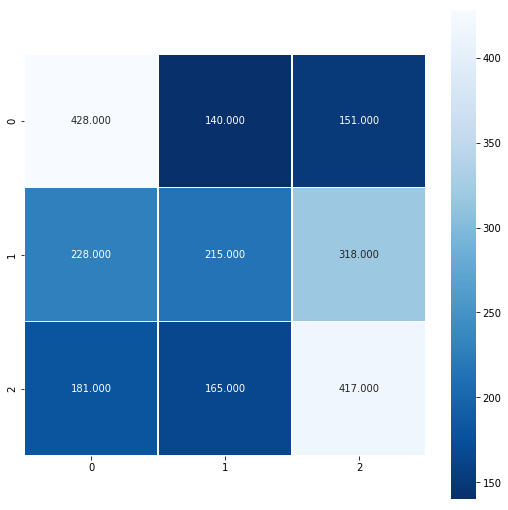

In [71]:
from sklearn.metrics import accuracy_score

predictions_LR = LR.predict(x_test)
acc = balanced_accuracy_score(predictions_LR, y_test) 
print("Logistic Regression Test Accuracy:",acc)
print()
cm_LR = metrics.confusion_matrix(y_test, predictions_LR)
print(cm_LR)

plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')



In [72]:
X_train[:5]

array([[0.        , 0.6       , 0.91304348, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.4       , 0.86956522, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0. 

In [73]:
test_set2 = X

test_set2_labels = test_set2["Accident_Severity"].copy()
test_set2 = test_set2.drop("Accident_Severity", axis=1)

y_test2 = le.fit_transform(test_set2_labels)


In [74]:
test_set2 = scaler.transform(test_set2)

In [75]:
test_set2.shape

(22422, 40)

Logistic Regression Test Accuracy: 0.4675526509037564

[[4422 1488 1564]
 [2459 2154 2861]
 [1817 1564 4093]]


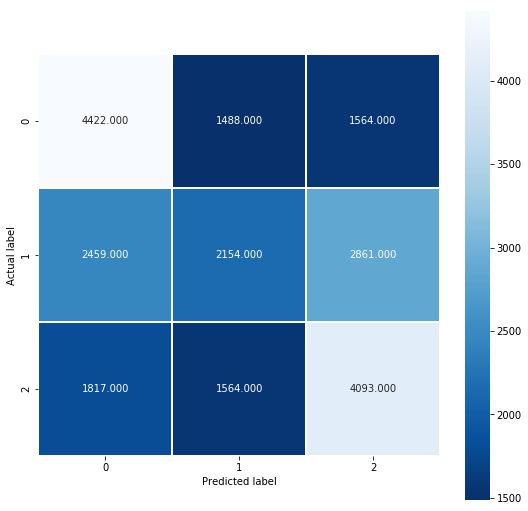

In [76]:
predictions2_LR = LR.predict(test_set2)

acc = balanced_accuracy_score(predictions2_LR, y_test2)
# acc = cohen_kappa_score(predictions2_LR, y_test2)
print("Logistic Regression Test Accuracy:",acc)
print()
cm_LR = metrics.confusion_matrix(y_test2, predictions2_LR)
print(cm_LR)

plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [77]:
# Balanced Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier

BRFC = BalancedRandomForestClassifier(random_state=42)


from sklearn.model_selection import train_test_split
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Separate labels from the rest of the dataset
X2_train_labels = X2_train["Accident_Severity"].copy()
X2_train = X2_train.drop("Accident_Severity", axis=1)

X2_test_labels = X2_test["Accident_Severity"].copy()
X2_test = X2_test.drop("Accident_Severity", axis=1)

X2_train_labels = le.fit_transform(X2_train_labels)
X2_test_labels = le.fit_transform(X2_test_labels)


from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(X2_train)

X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)



BRFC.fit(X2_train_scaled, X2_train_labels)





Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=None, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=42, replacement=False,
                sampling_strategy='auto', verbose=0, warm_start=False)

BRFC: 0.37320910800882645

[[  903   299   285]
 [ 6270  4889  6820]
 [24846 19904 61597]]


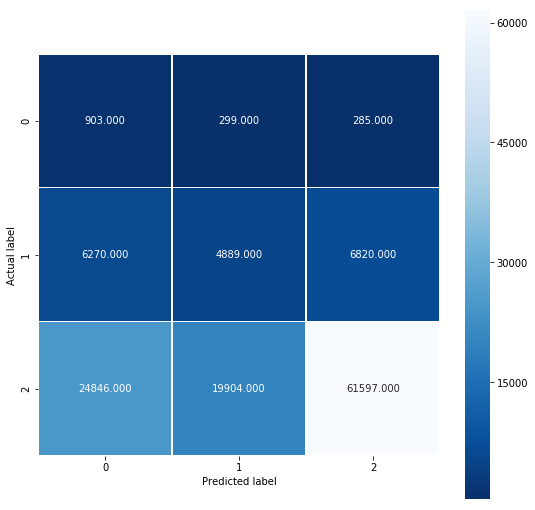

In [78]:
predictions2_BRFC = BRFC.predict(X2_test_scaled)

acc = balanced_accuracy_score(predictions2_BRFC, X2_test_labels)
# acc = cohen_kappa_score(predictions2_BRFC, X2_test_labels)
print("BRFC:",acc)
print()
cm_BRFC = metrics.confusion_matrix(X2_test_labels, predictions2_BRFC)
print(cm_BRFC)

plt.figure(figsize=(9,9))
sns.heatmap(cm_BRFC, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [79]:
# Easy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier

EEC = EasyEnsembleClassifier(random_state=42)


# from sklearn.model_selection import train_test_split
# X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# # Separate labels from the rest of the dataset
# X2_train_labels = X2_train["Accident_Severity"].copy()
# X2_train = X2_train.drop("Accident_Severity", axis=1)

# X2_test_labels = X2_test["Accident_Severity"].copy()
# X2_test = X2_test.drop("Accident_Severity", axis=1)

# X2_train_labels = le.fit_transform(X2_train_labels)
# X2_test_labels = le.fit_transform(X2_test_labels)


# from sklearn.preprocessing import MinMaxScaler as Scaler

# scaler = Scaler()
# scaler.fit(X2_train)

# X2_train_scaled = scaler.transform(X2_train)
# X2_test_scaled = scaler.transform(X2_test)



EEC.fit(X2_train_scaled, X2_train_labels)



EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
            random_state=42, replacement=False, sampling_strategy='auto',
            verbose=0, warm_start=False)

EEC: 0.37278689721858543

[[  950   262   275]
 [ 6307  4494  7178]
 [24649 18415 63283]]


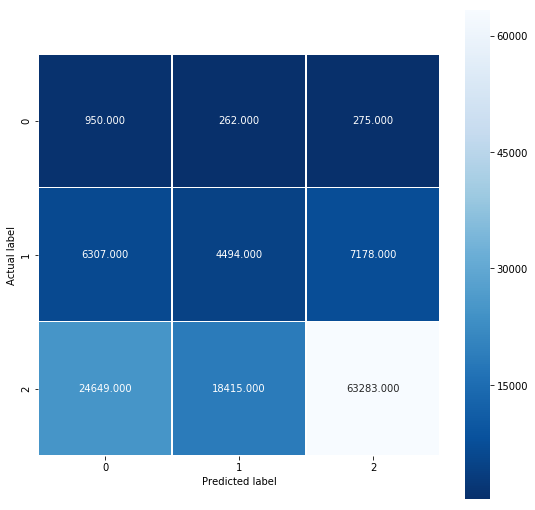

In [80]:
predictions2_EEC = EEC.predict(X2_test_scaled)

acc = balanced_accuracy_score(predictions2_EEC, X2_test_labels)
# acc = cohen_kappa_score(predictions2_BRFC, X2_test_labels)
print("EEC:",acc)
print()
cm_EEC = metrics.confusion_matrix(X2_test_labels, predictions2_EEC)
print(cm_EEC)

plt.figure(figsize=(9,9))
sns.heatmap(cm_EEC, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');